In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-campaign/bank.csv
/kaggle/input/bank-marketing-campaign/bank-full.csv
/kaggle/input/bank-marketing-campaign/bank-full - Copy.csv
/kaggle/input/bank-marketing-campaign/bank-names - Copy.txt


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# Data Description:
- 1 - age (numeric)
- 2 - job: type of job (categorical): 
- 3 - marital: marital status (categorical):
- 4 - education (categorical):
- 5 - default: has credit in default? (binary):
- 6 - balance: average yearly balance, in euros (numeric)
- 7 - housing: has housing loan? (binary):
- 8 - loan: has personal loan? (binary):
- 9 - contact: contact communication type (categorical):
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical):
- 12 - duration: last contact duration, in seconds (numeric)
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical):
- 17 - y: has the client subscribed a term deposit? (binary):
  - "yes"
  - "no"

In [3]:
train = pd.read_csv('../input/bank-marketing-campaign/bank-full.csv', sep=';')
test = pd.read_csv('../input/bank-marketing-campaign/bank.csv', sep=';')

# Inspecting Data

In [4]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
train.shape

(45211, 17)

In [7]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
# Change data types
train['job'] = train['job'].astype('category')
train['marital'] = train['marital'].astype('category')
train['education'] = train['education'].astype('category')
train['contact'] = train['contact'].astype('category')
train['month'] = train['month'].astype('category')
train['poutcome'] = train['poutcome'].astype('category')
train['y'] = train['y'].astype('category')

In [10]:
# Change data types
test['job'] = test['job'].astype('category')
test['marital'] = test['marital'].astype('category')
test['education'] = test['education'].astype('category')
test['contact'] = test['contact'].astype('category')
test['month'] = test['month'].astype('category')
test['poutcome'] = test['poutcome'].astype('category')
test['y'] = test['y'].astype('category')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

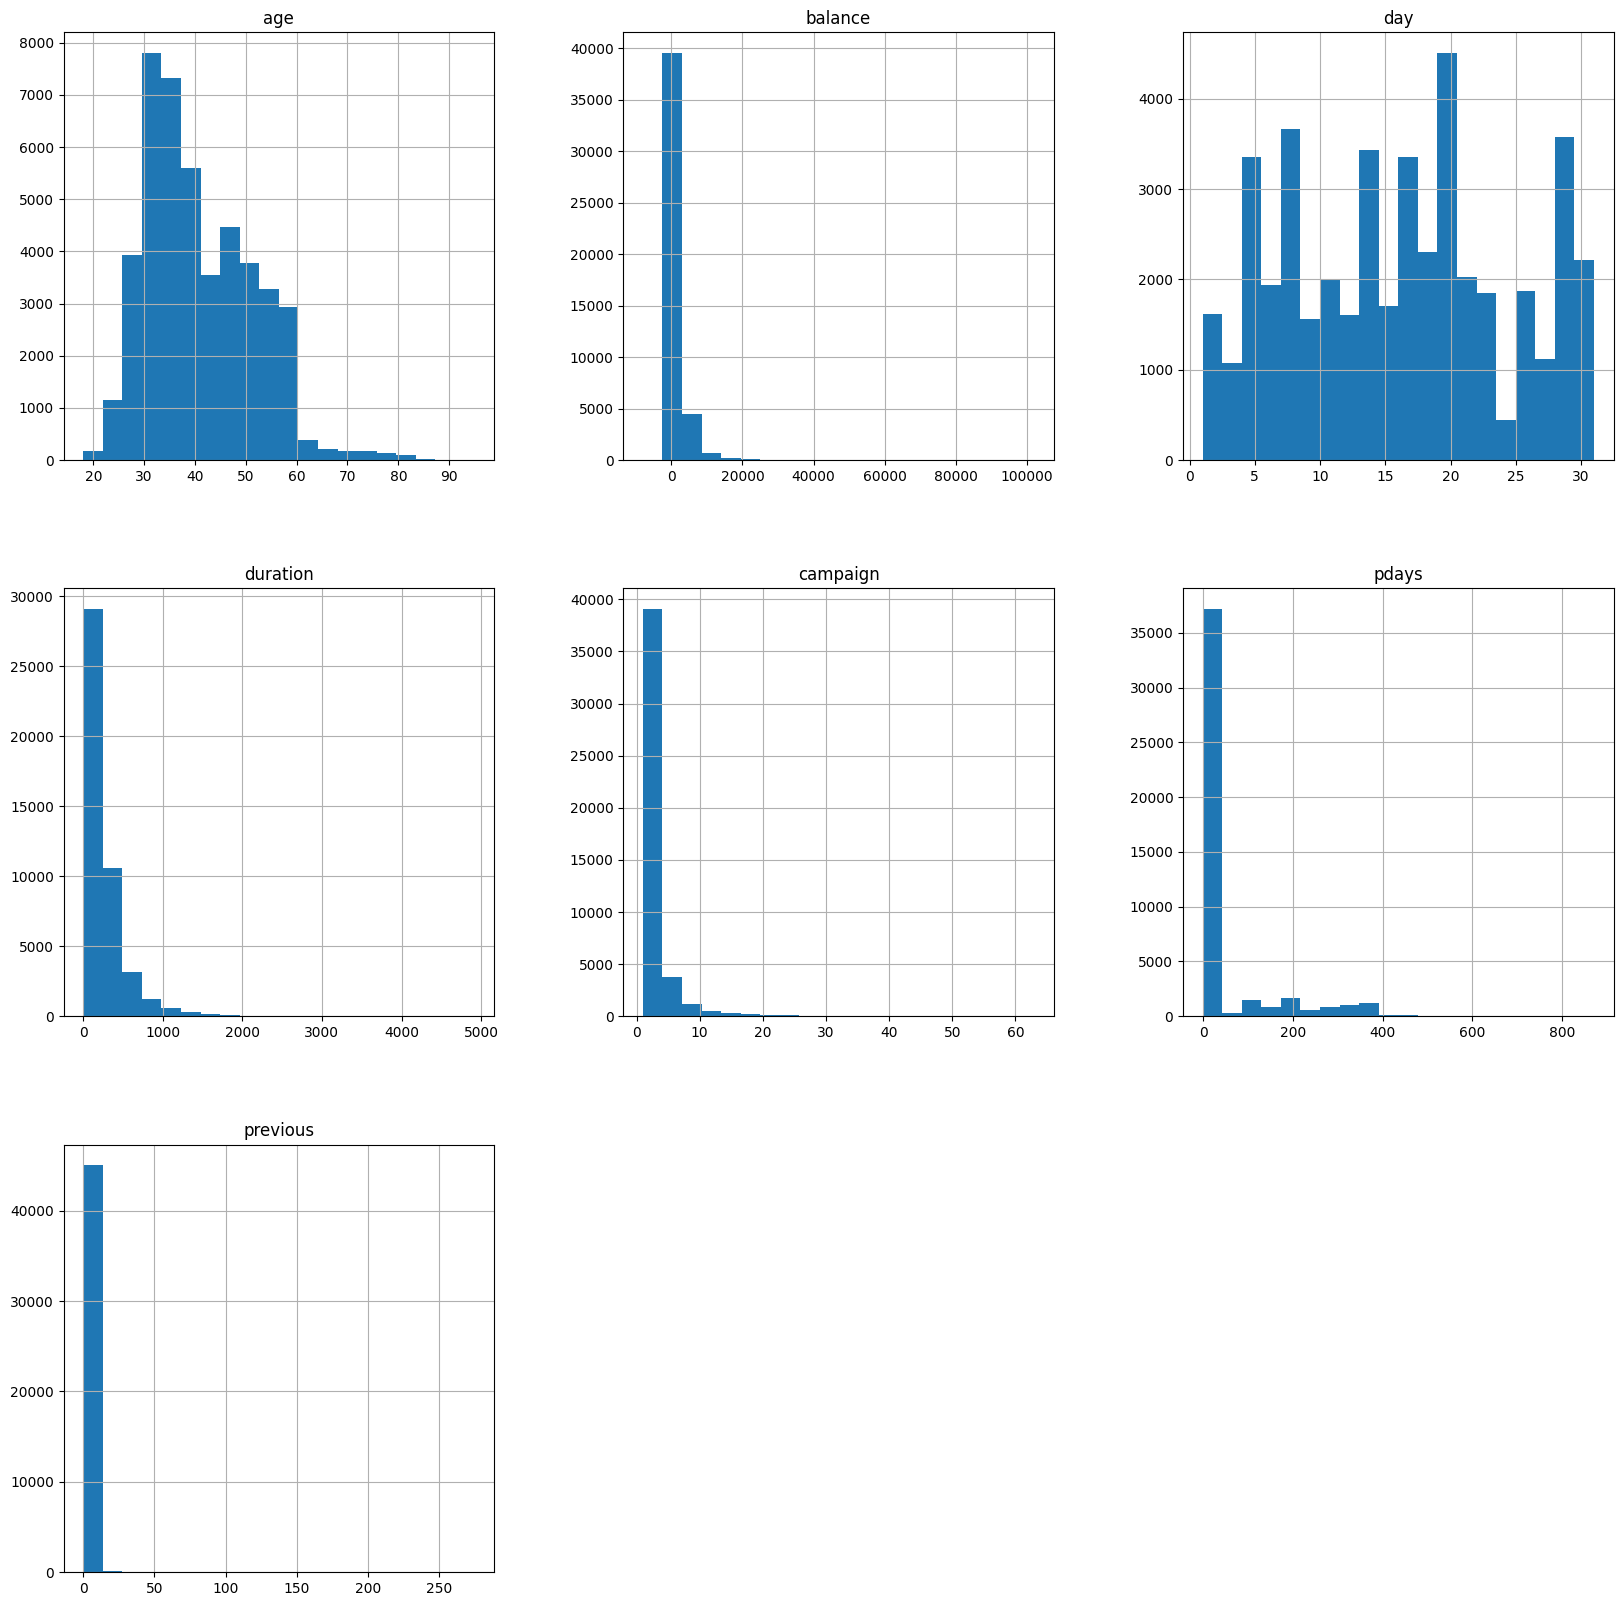

In [11]:
# check distributions using historgram
train.hist(bins = 20, figsize= (20,20))

In [12]:
#target Variable distribution
train['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

This suggests that the dataset is imbalanced and we need to use resampling techniques or more robust algorithms like Random Forest, GBM to handle this efficiently.

In [13]:
train['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [14]:
train['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [ ]:
train['education'].value_counts()

In [ ]:
train['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [ ]:
train['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [ ]:
train['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [ ]:
train['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [ ]:
train['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [ ]:
train['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [ ]:
train['age'].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [ ]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
test['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

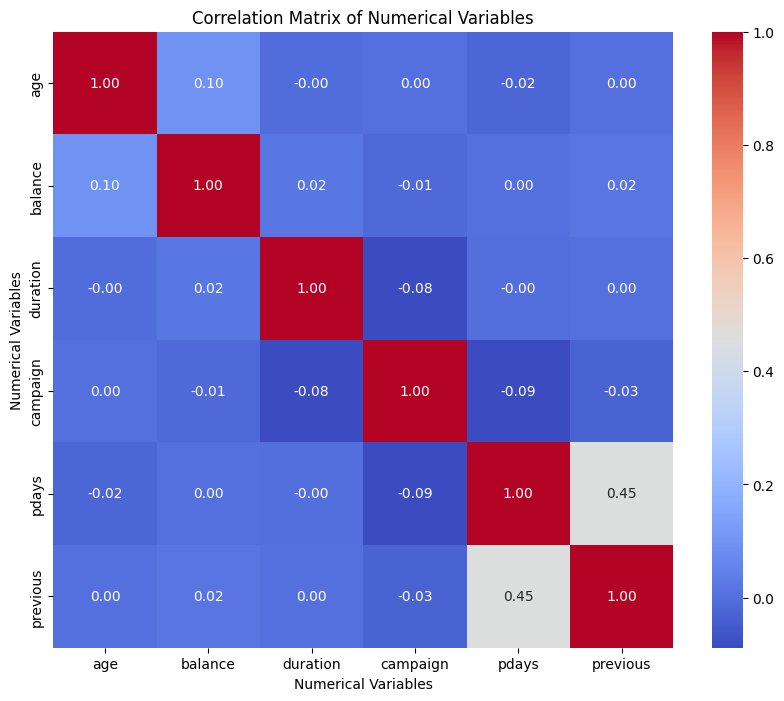

In [25]:
# Select numerical columns for correlation analysis
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Compute the correlation matrix
correlation_matrix = train[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')
plt.show()

# **Data Preprocessing**

In [26]:
train.dtypes

age             int64
job          category
marital      category
education    category
default        object
balance         int64
housing        object
loan           object
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [27]:
train['loan'] = train['loan'].map( {'yes': 1, 'no': 0} ).astype(int)
train['housing'] = train['housing'].map( {'yes': 1, 'no': 0} ).astype(int)
train['default'] = train['default'].map( {'yes': 1, 'no': 0} ).astype(int)

In [28]:
test['loan'] = test['loan'].map( {'yes': 1, 'no': 0} ).astype(int)
test['housing'] = test['housing'].map( {'yes': 1, 'no': 0} ).astype(int)
test['default'] = test['default'].map( {'yes': 1, 'no': 0} ).astype(int)

In [29]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [30]:
# one-hot encoding for catrgorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

encoder = OneHotEncoder(sparse=False, drop='first') 
encoded_cols = pd.DataFrame(encoder.fit_transform(train[categorical_cols]))

encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_cols.columns = encoded_feature_names

train_encoded = pd.concat([train.drop(columns=categorical_cols), encoded_cols], axis=1)

In [31]:
# one-hot encoding for catrgorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(test[categorical_cols]))

encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_cols.columns = encoded_feature_names

test_encoded = pd.concat([test.drop(columns=categorical_cols), encoded_cols], axis=1)

In [32]:
train_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,no,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,no,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,no,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,no,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# using StandardScaler to transform numerical columns
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

train_encoded[numerical_cols] = scaler.fit_transform(train_encoded[numerical_cols])

In [34]:
#using StandardScaler to transform numerical columns
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

test_encoded[numerical_cols] = scaler.fit_transform(test_encoded[numerical_cols])

In [35]:
train_encoded['y'] = train_encoded['y'].map( {'yes': 1, 'no': 0} ).astype(int)

In [36]:
test_encoded['y'] = test_encoded['y'].map( {'yes': 1, 'no': 0} ).astype(int)

In [37]:
train_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,5,0.011016,-0.569351,-0.411453,-0.25194,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.288529,-0.437895,5,-0.416127,-0.569351,-0.411453,-0.25194,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.747384,-0.446762,5,-0.707361,-0.569351,-0.411453,-0.25194,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.571051,0.047205,5,-0.645231,-0.569351,-0.411453,-0.25194,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.747384,-0.447091,5,-0.233620,-0.569351,-0.411453,-0.25194,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Modelling

In [38]:
X_train = train_encoded.drop('y', axis=1)  # Features
y_train = train_encoded['y']  # Target variable

In [39]:
X_test = test_encoded.drop('y', axis=1)  # Features
y_test = test_encoded['y']

## Random Forest

In [40]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
    'max_depth': [1,2, 5, 10, 15],
    'min_samples_split': [0.5,1,2,5,10],
    'min_samples_leaf': [0.1, 0.5, 1, 2],
}

# Grid Search CV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 0.1, 'min_samples_split': 2, 'n_estimators': 25}


In [41]:
# Initialize Random Forest Classifier with best hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=0.1, random_state=42)

# Train model
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=0.1, n_estimators=25,
                       random_state=42)

In [42]:
# test data predictions
y_pred_rf = best_rf_model.predict(X_test)

In [43]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Generate classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 88.48%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



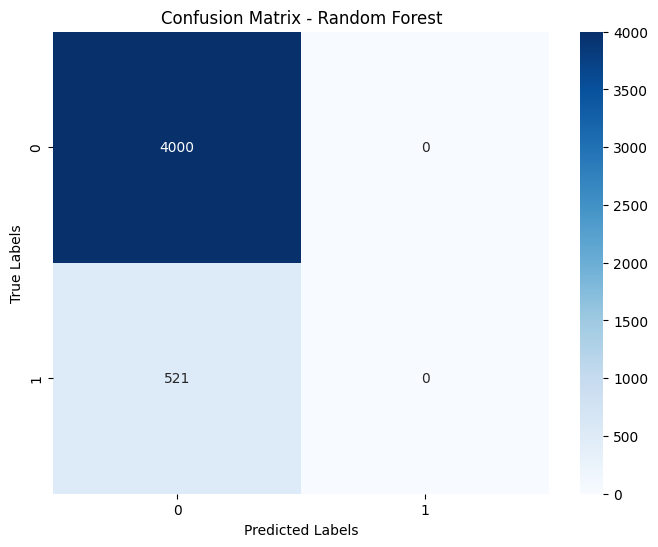

In [44]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [45]:
# Perform cross-validation with best model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.88300343 0.88310108 0.88299049 0.88299049 0.88299049]
Mean CV Accuracy: 0.8830


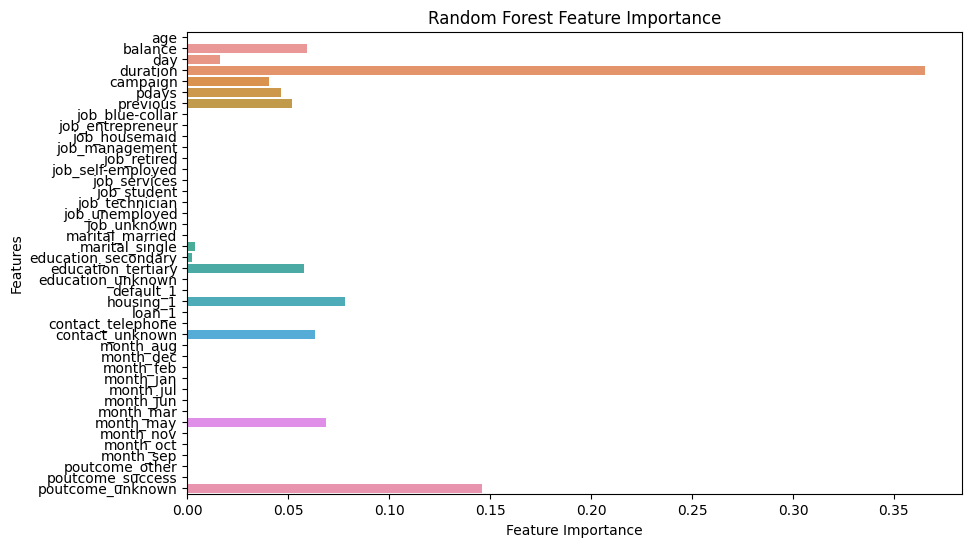

In [46]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

Looks like the Random Forest model is not performing well in identifying successful term deposit subscriptions.

* The precision, recall, and F1-score for Class 1 are all 0.00, indicating that the model does not effectively identify positive instances

* There may be several factors contributing to this, such as class imbalance, feature selection or model hyperparameters. Further analysis and model tuning are necessary to improve its predictive ability.

## XGBoost

In [47]:
import xgboost as xgb

In [48]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [49]:
# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=8,objective='binary:logistic', seed=42)

# Initialize Grid Search CV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [50]:
# Make predictions on the test set using the best model
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\n XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.7658

 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      4000
           1       0.31      0.85      0.45       521

    accuracy                           0.77      4521
   macro avg       0.64      0.80      0.65      4521
weighted avg       0.90      0.77      0.81      4521



In [51]:
# Perform cross-validation with the best model
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.82151941 0.71543906 0.66887857 0.49646096 0.5642557 ]
Mean CV Accuracy: 0.6533


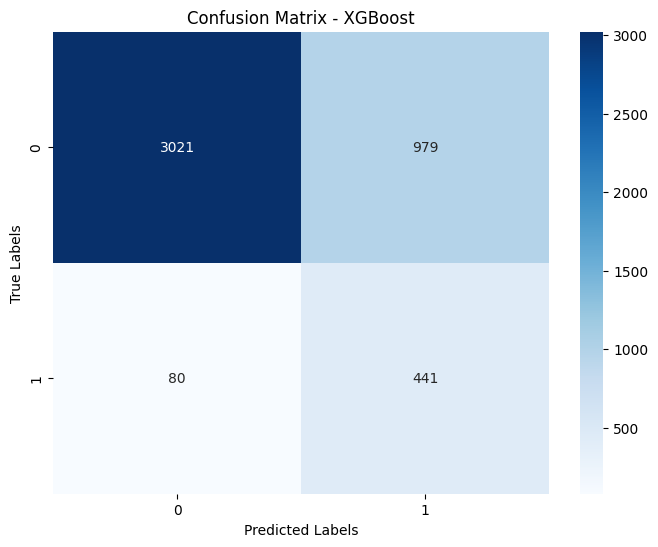

In [52]:
# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

XGBoost model seems to be performing better than Random forest model.

* The model shows reasonably high recall (85%), suggesting that it can effectively identify clients who are likely to subscribe to term deposits. However, the precision (31%) and F1-score (0.45) for Class 1 indicate that there is room for improvement in reducing false positives. 

## LGBoost

In [53]:
import lightgbm as lgb

In [54]:
# Define parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [55]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(is_unbalance=True,random_state=42,verbose=-1)

# Initialize Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search CV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [56]:
# Make predictions on the test set using the best model
best_lgb_model = grid_search.best_estimator_
y_pred_lgb = best_lgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report and confusion matrix
print("\n LGBoost Classification Report:")
print(classification_report(y_test, y_pred_lgb))

Accuracy: 0.8938

 LGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4000
           1       0.54      0.49      0.51       521

    accuracy                           0.89      4521
   macro avg       0.74      0.72      0.73      4521
weighted avg       0.89      0.89      0.89      4521



In [57]:
# Perform cross-validation with the best model
cv_scores = cross_val_score(best_lgb_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.89726861 0.84406105 0.82990489 0.81209909 0.83167441]
Mean CV Accuracy: 0.8430


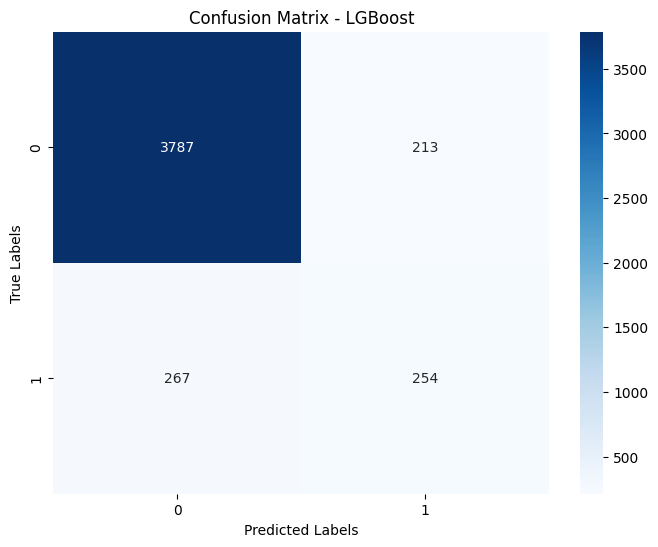

In [58]:
# Calculate confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [59]:
cm_lgb

array([[3787,  213],
       [ 267,  254]])

LGB's performance in predicting if a client will subscribe to a term deposit (Class 1) is moderate when compared to XGBoost, but still better than Random Forest. The precision of 0.54 means that out of all instances predicted as subscribing to a term deposit, 54% were correct predictions. The recall of 0.49 indicates that the model captured 49% of all actual instances where clients subscribed to term deposits. 

# Roc Curve of best model

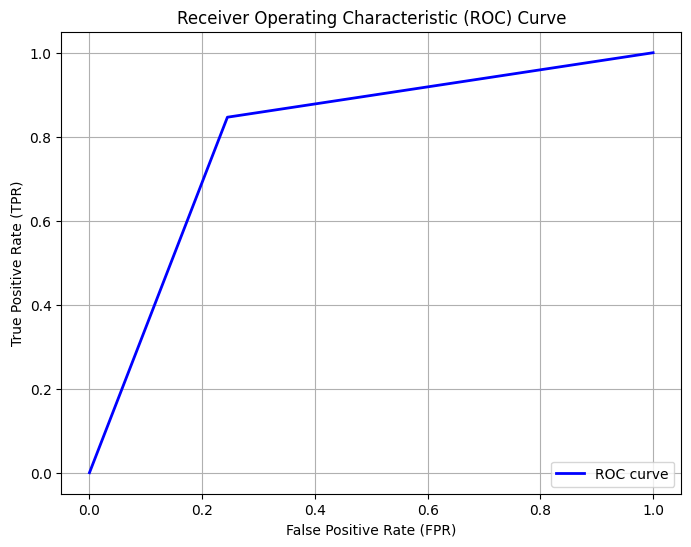

ROC AUC Score: 0.8008495681381957


In [65]:
from sklearn import metrics

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print('ROC AUC Score:', roc_auc)

ROC AUC score is approximately 0.801, which indicates that XGBoost model has a relatively good ability to distinguish between the classes

> ***Out of the models used, XGBoost seems to be the best model at predicting if a client will subscribe to a term deposit.***